In [1]:
%matplotlib inline

import json
import pandas as pd
import numpy as np

import sys
import os
sys.path.append(os.path.abspath('../'))
from utils import results_1_dimentions
from dataset import SNPmarkersDataset

In [2]:
phenotypes = list(SNPmarkersDataset(mode='validation', skip_check=True, dir_path="../../Data/").phenotypes.keys())

# First run of the model

The goal here is to try a wide range of values in order to determine the interval where the model performances are the best. I choose to start from the default value of the sklearn library (ie 1) and evaluate both side. If the maximum in correlation is found at the boundary. Then a new run with an updated parameters range to try will be tried until this maximum is found.

> I will use here lambda to name the parameter of the ridge regression to stay consistant with the notation seen in the intro to ML course where this model was explaned. The sklearn library use alpha instead.

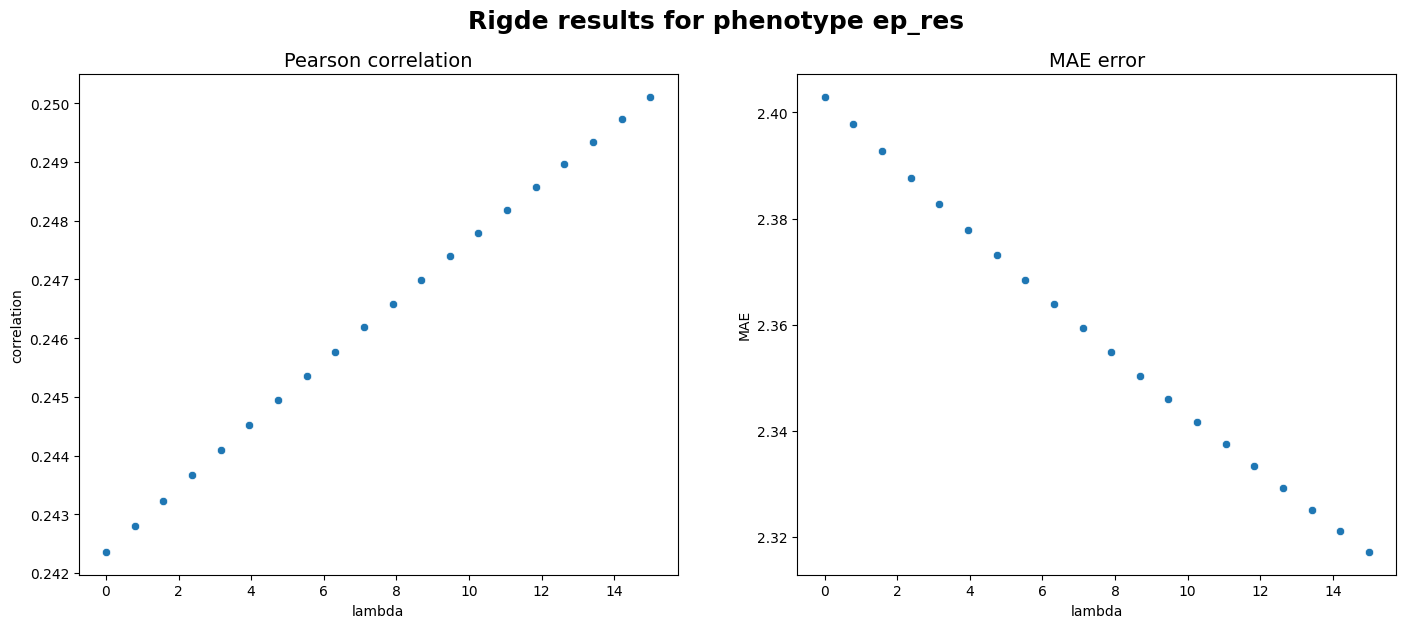

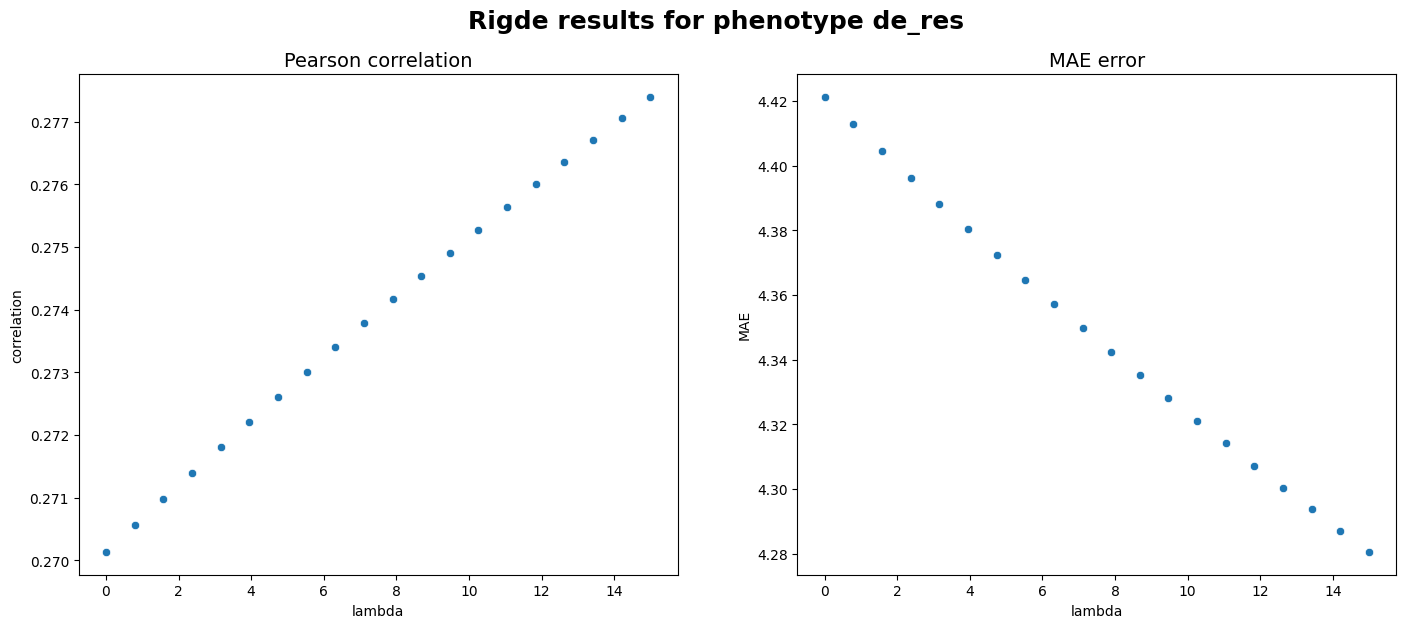

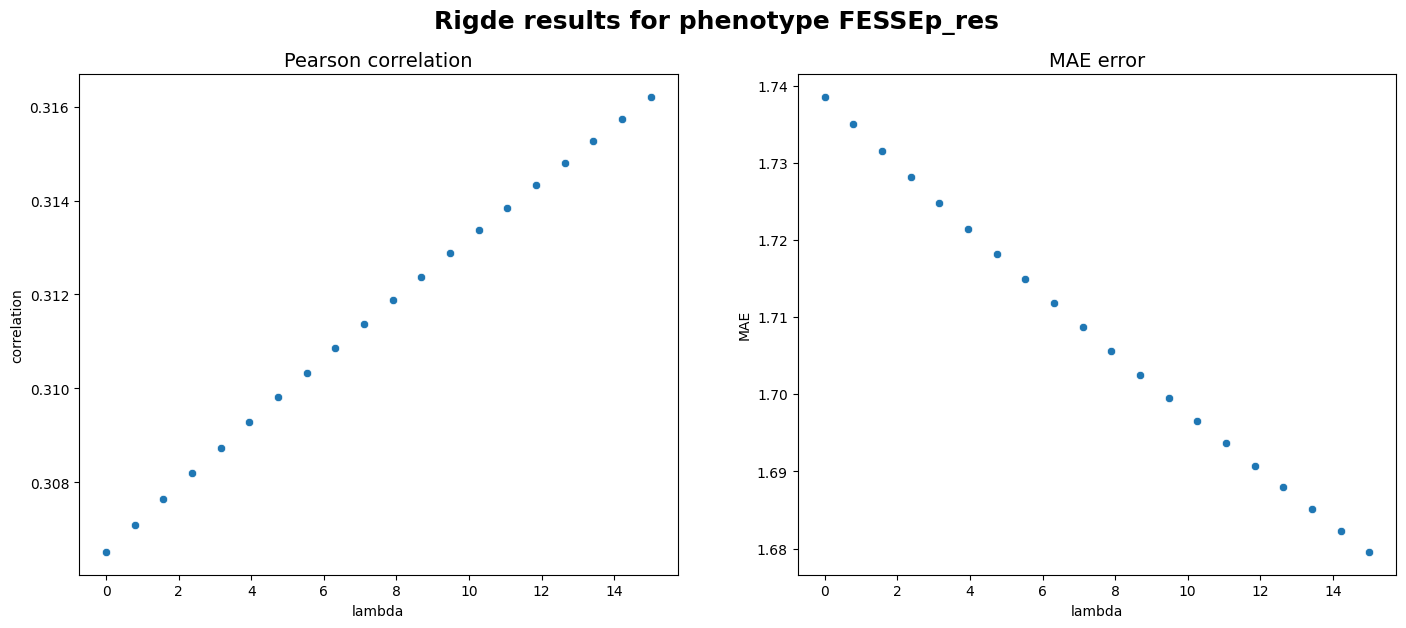

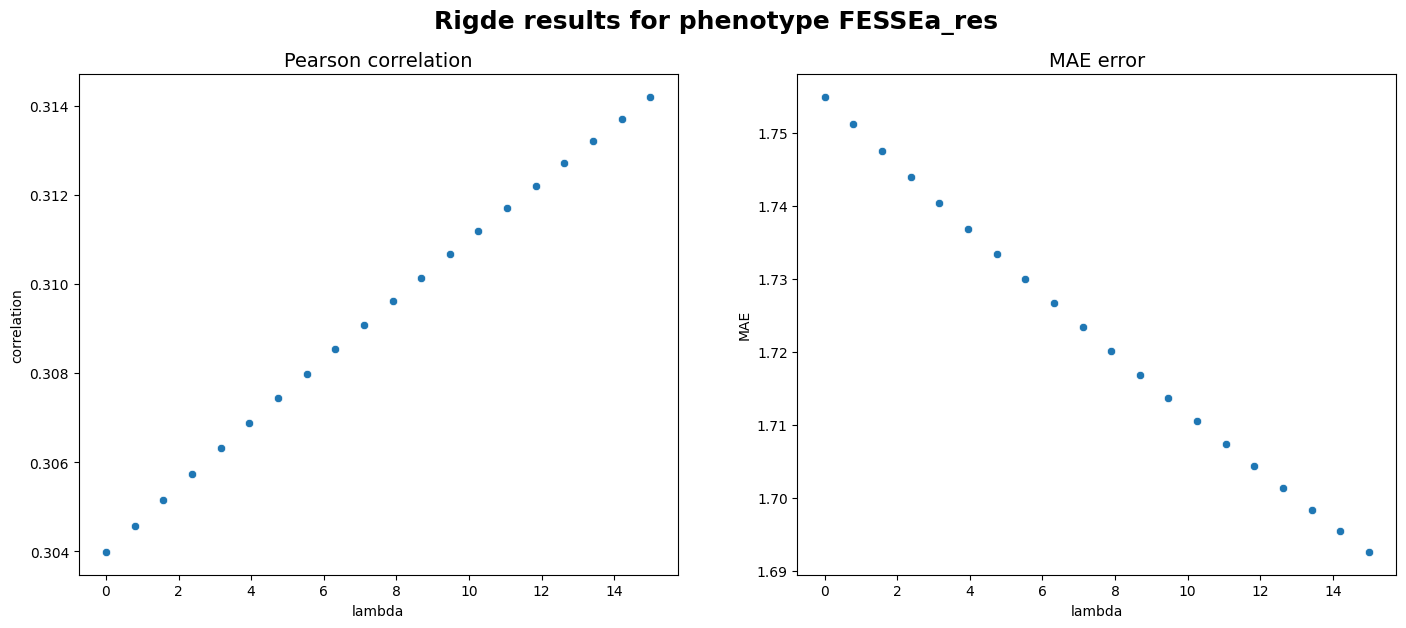

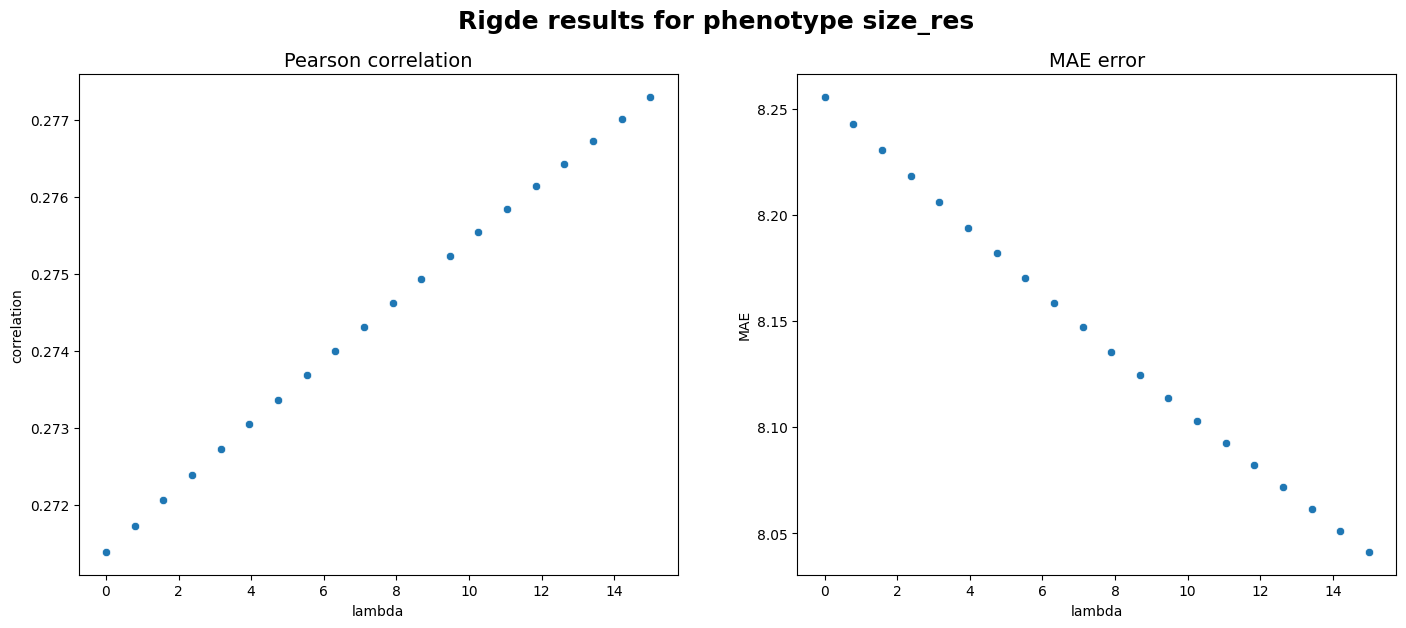

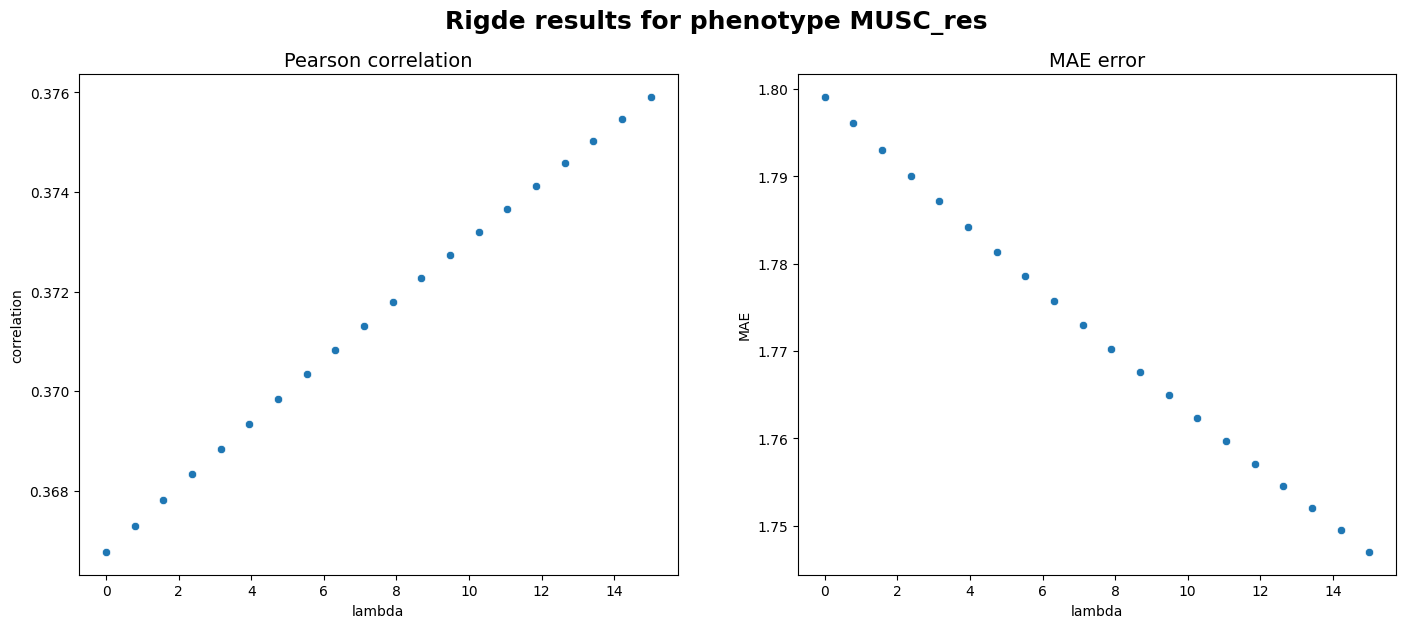

In [5]:
for phenotype in phenotypes:
    with open(f"../Results/ridge_{phenotype}.json", "r") as f:
        results = json.load(f)
        
        results_1_dimentions(
            results["correlation"],
            results["MAE"],
            results["dim_0_values"],
            f"Ridge results for phenotype {phenotype}",
            "Pearson correlation", 
            "MAE error", 
            results["dim_0_label"], 
            "correlation",
            "MAE")

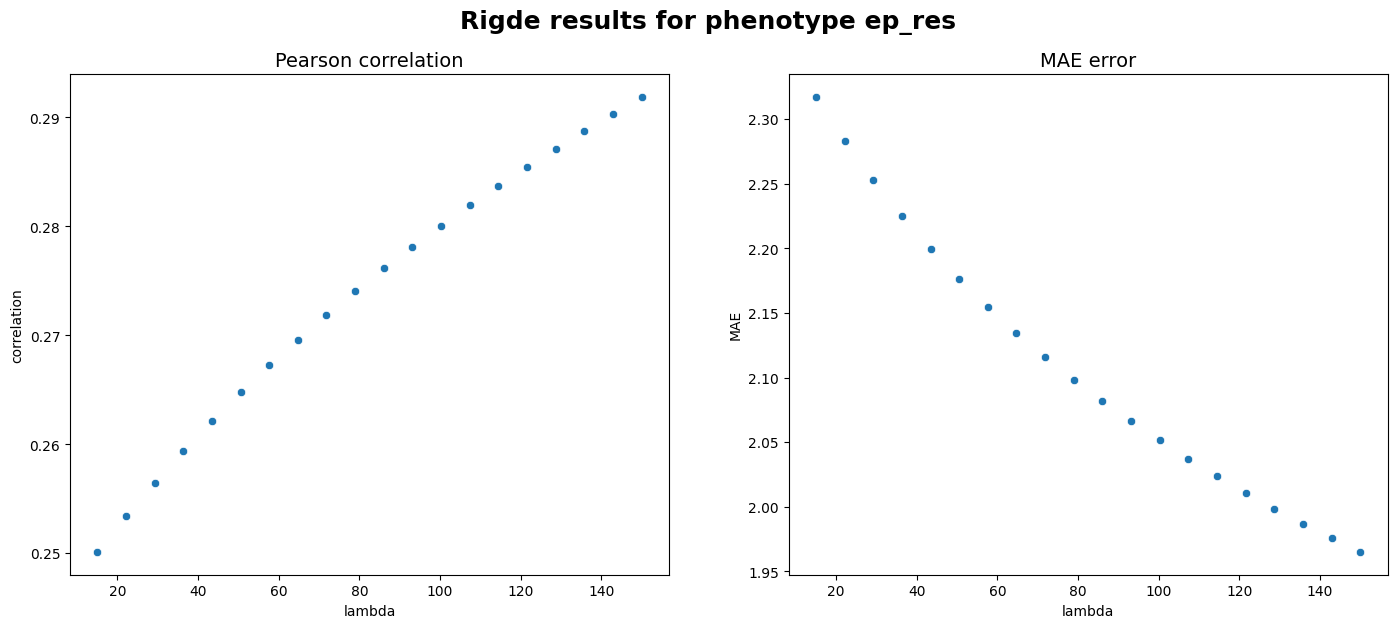

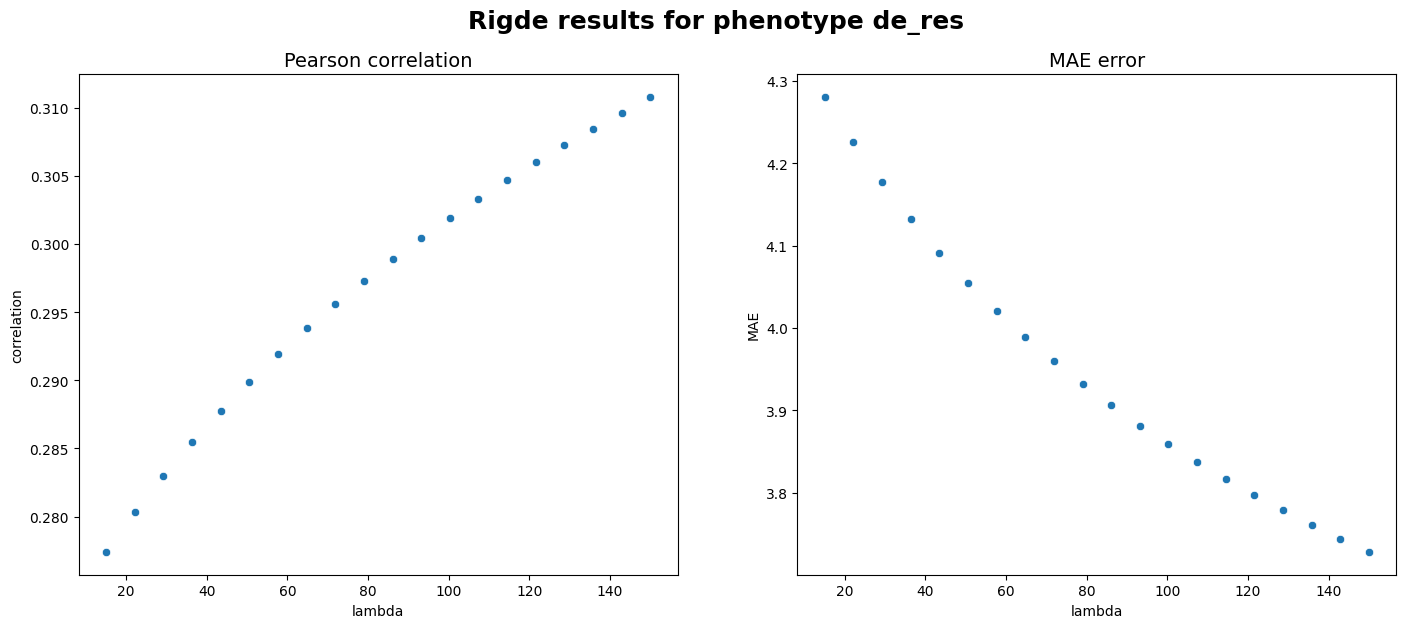

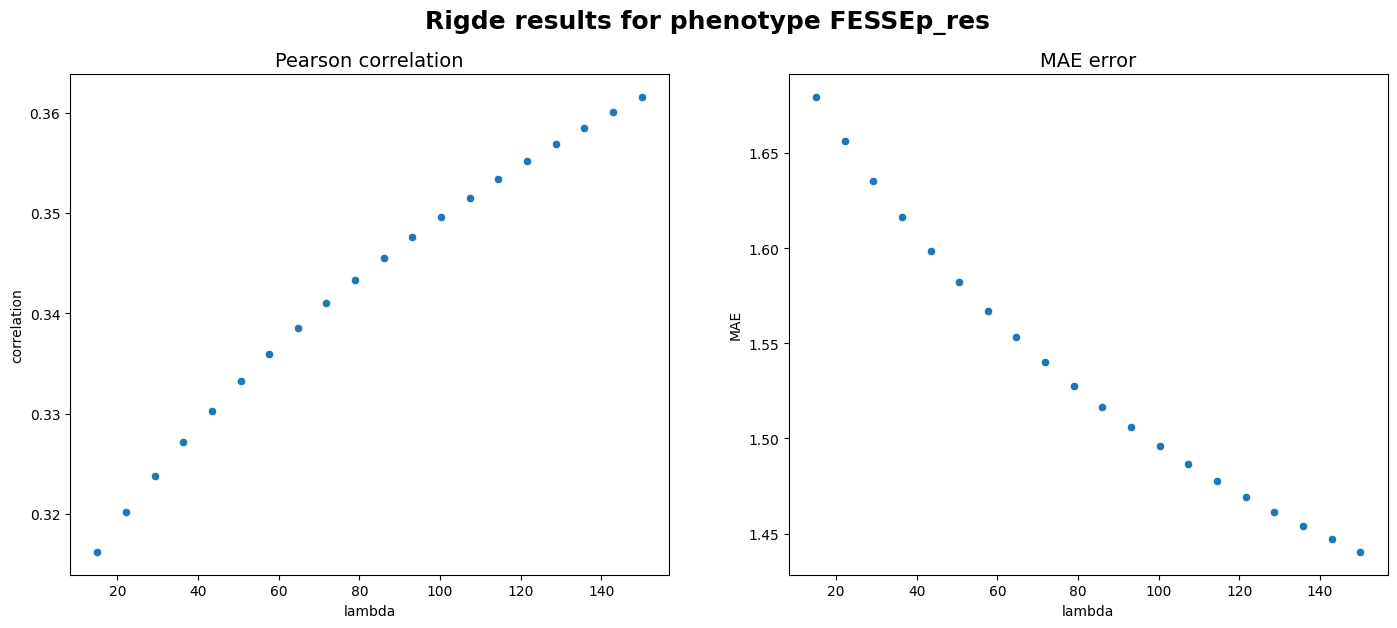

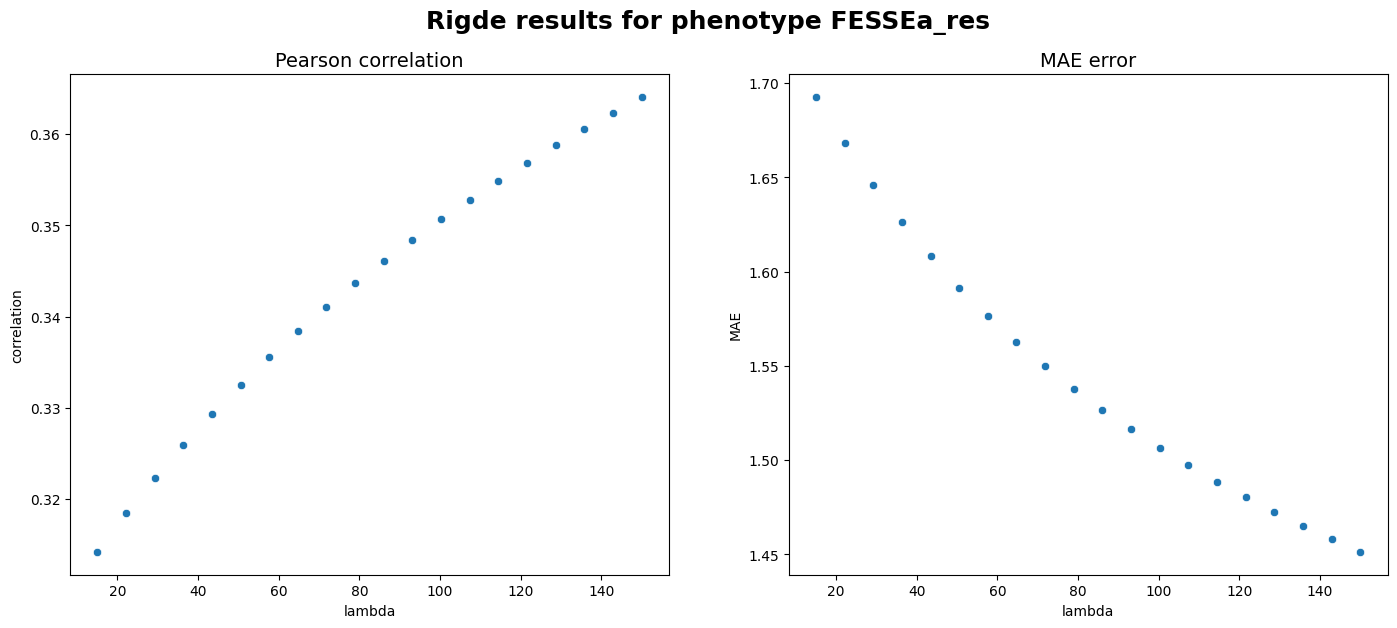

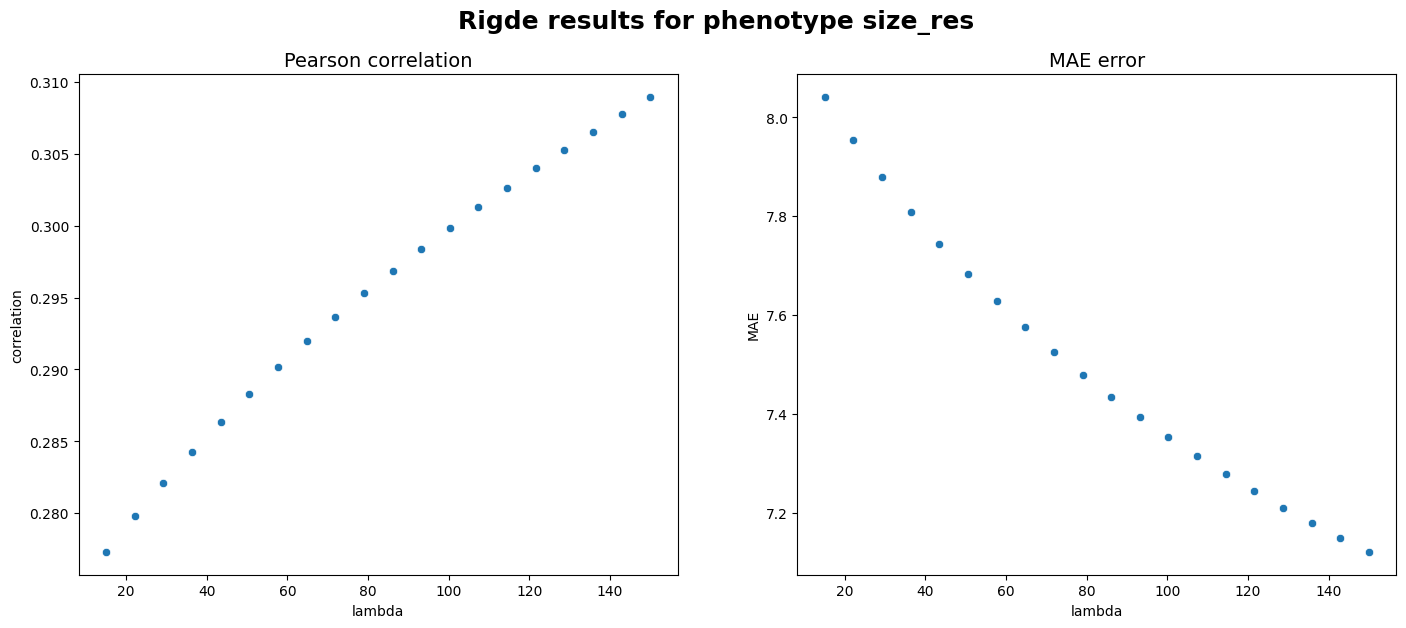

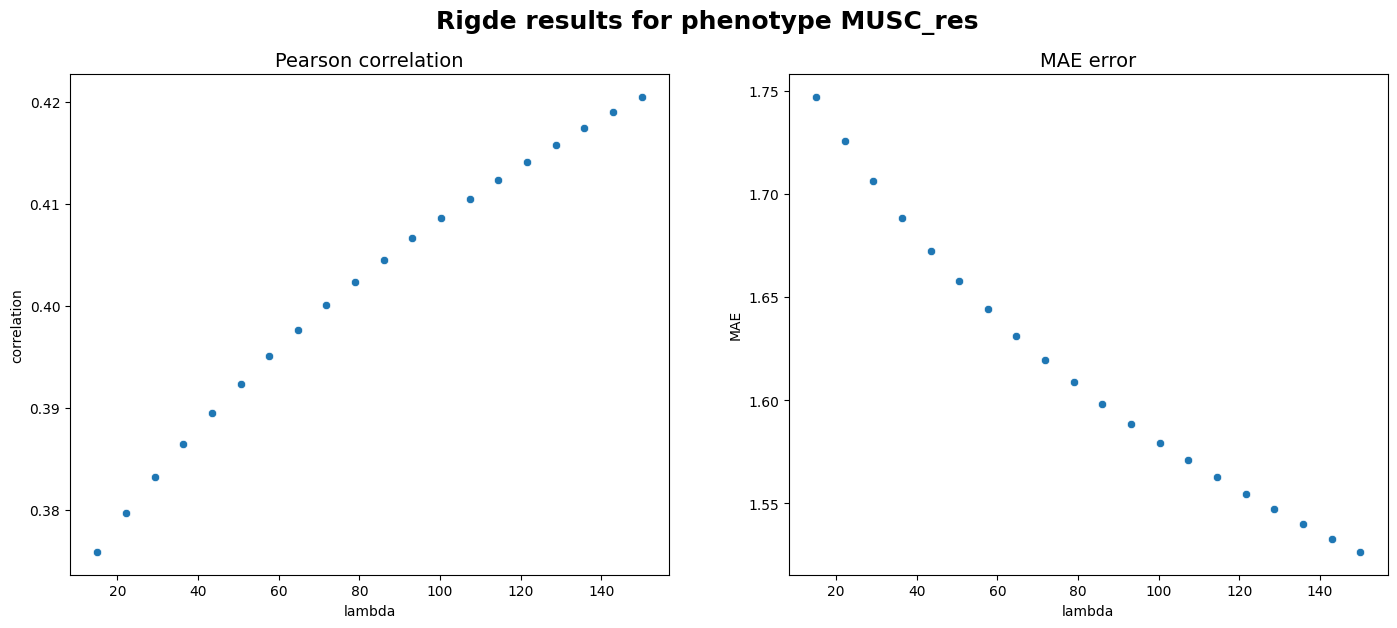

In [6]:
for phenotype in phenotypes:
    with open(f"../Results/ridge_2_{phenotype}.json", "r") as f:
        results = json.load(f)
        
        results_1_dimentions(
            results["correlation"],
            results["MAE"],
            results["dim_0_values"],
            f"Ridge results for phenotype {phenotype}",
            "Pearson correlation", 
            "MAE error", 
            results["dim_0_label"], 
            "correlation",
            "MAE")

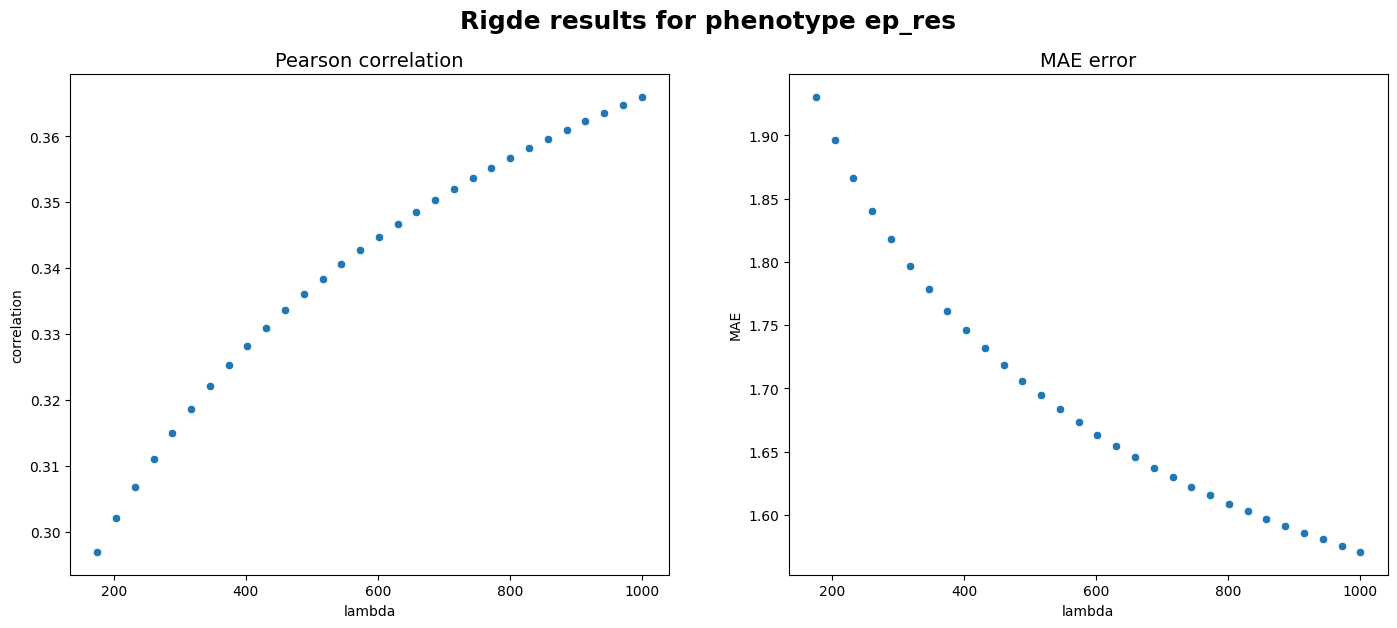

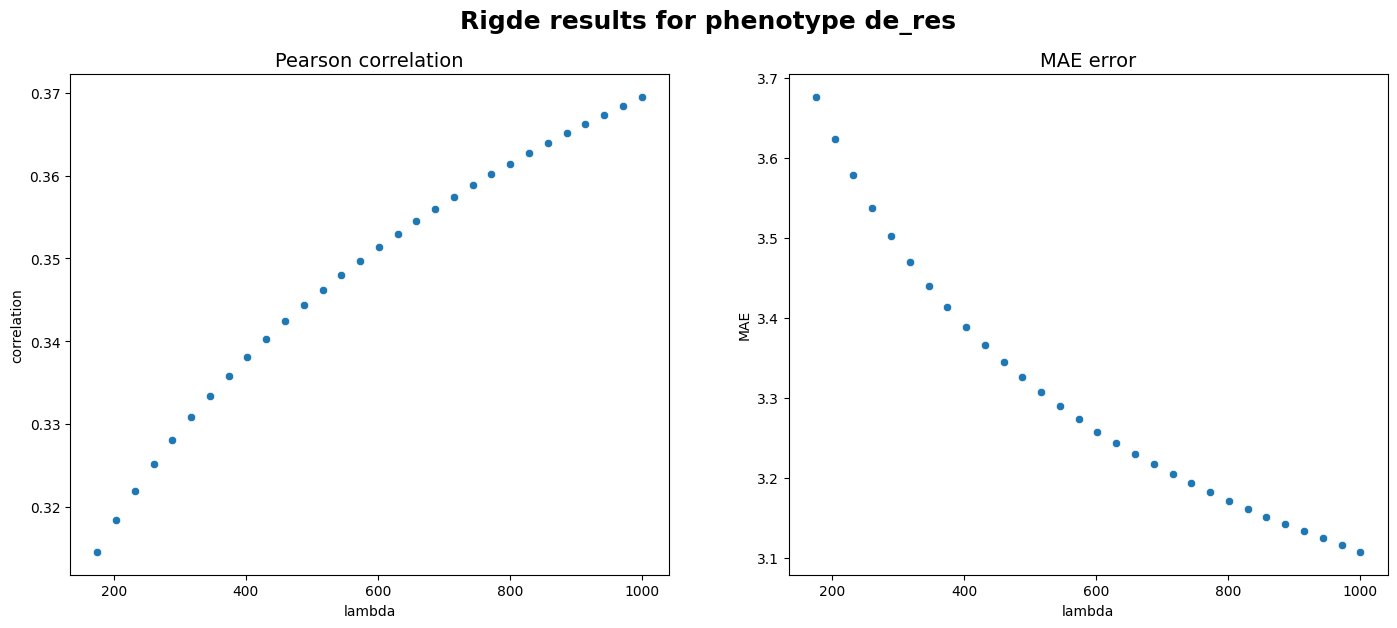

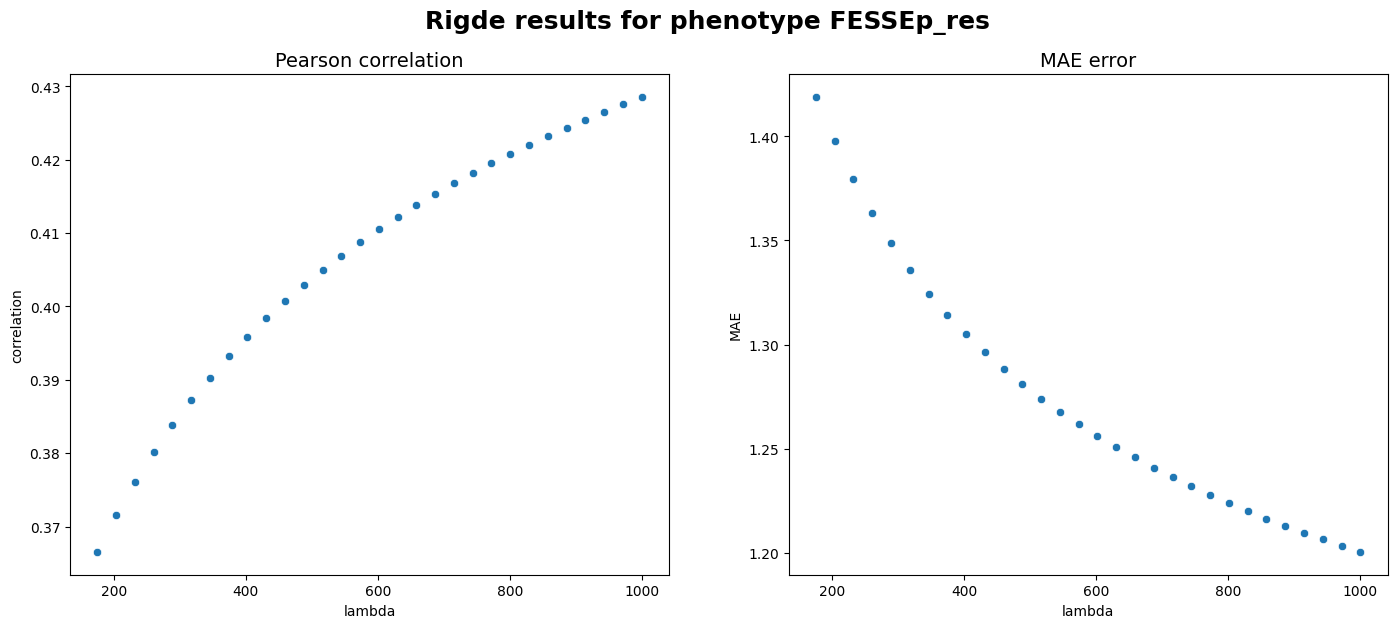

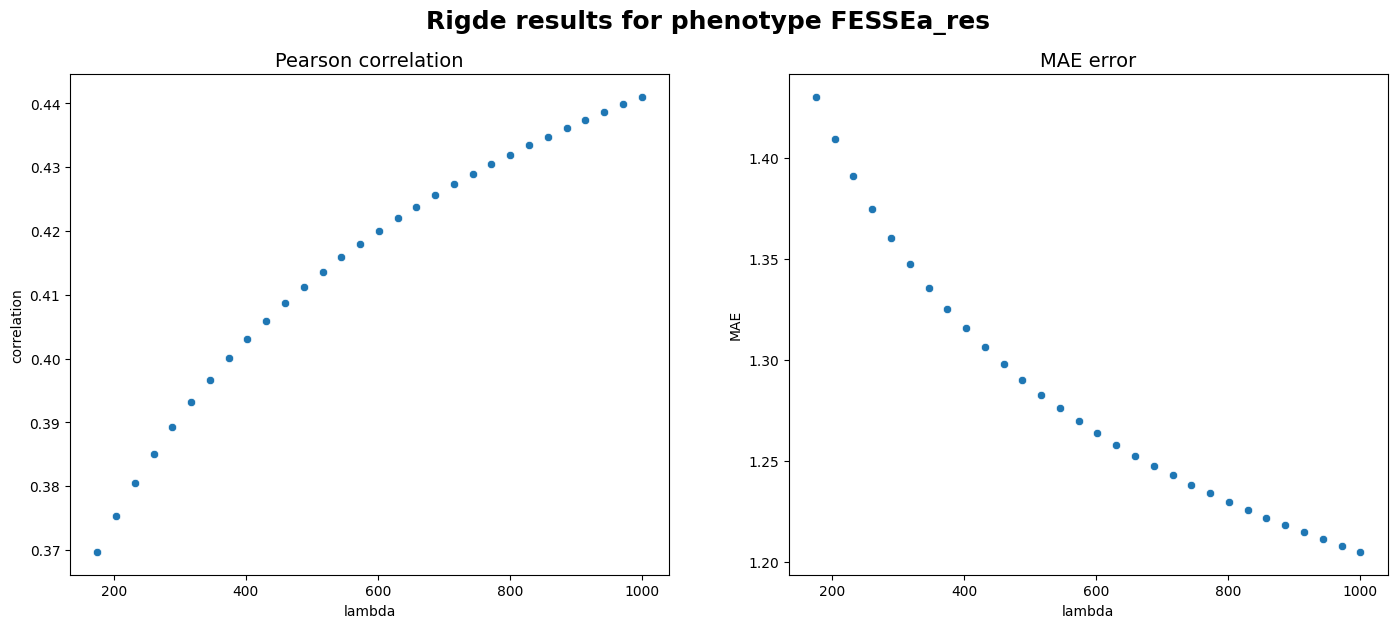

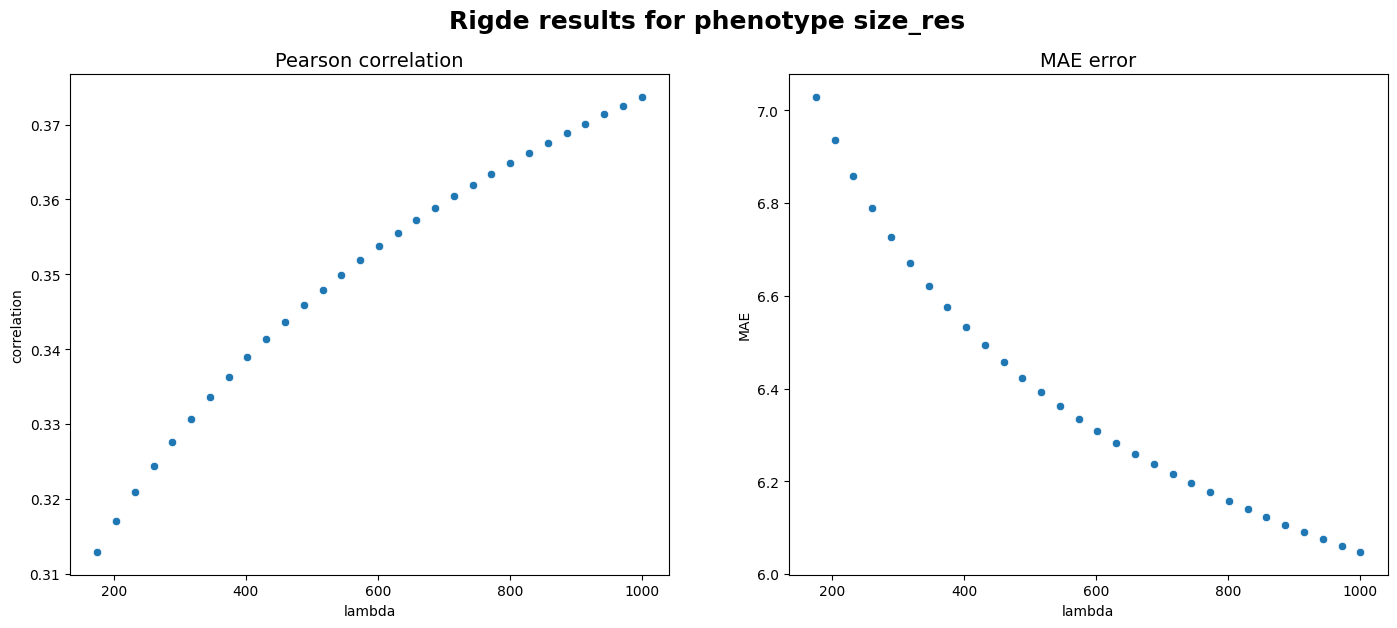

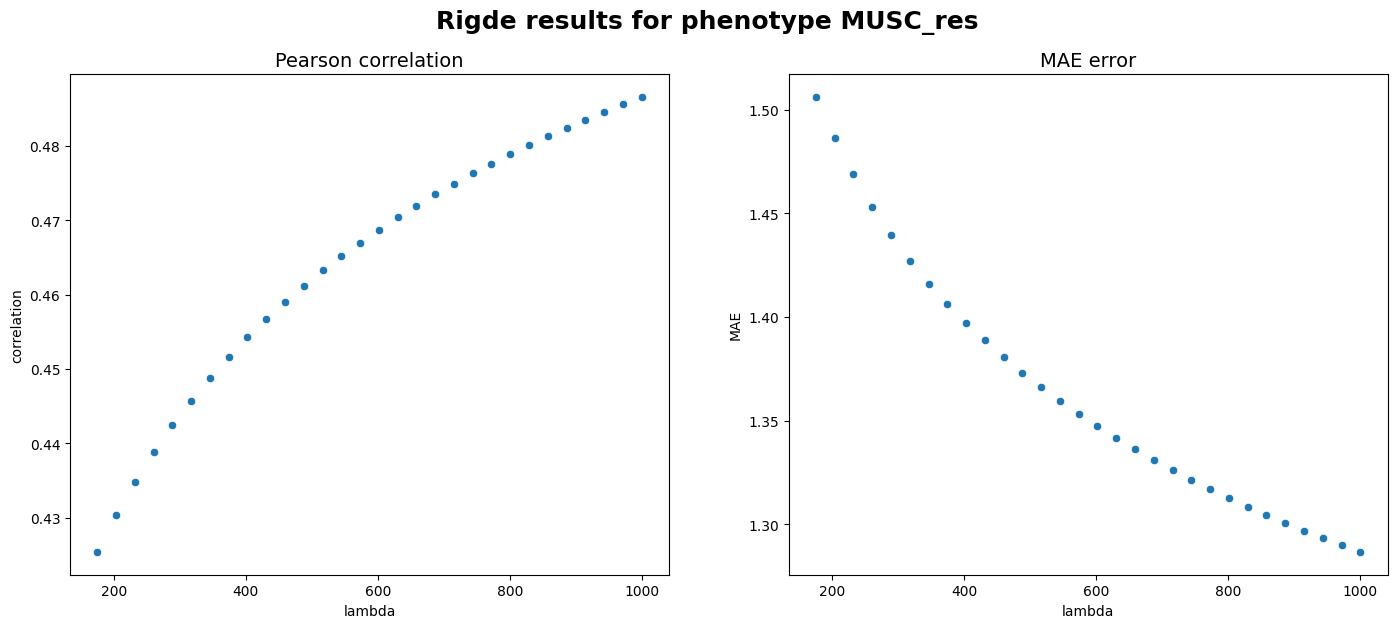

In [ ]:
for phenotype in phenotypes:
    with open(f"../Results/ridge_3_{phenotype}.json", "r") as f:
        results = json.load(f)
        
        results_1_dimentions(
            results["correlation"],
            results["MAE"],
            results["dim_0_values"],
            f"Ridge results for phenotype {phenotype}",
            "Pearson correlation", 
            "MAE error", 
            results["dim_0_label"], 
            "correlation",
            "MAE")

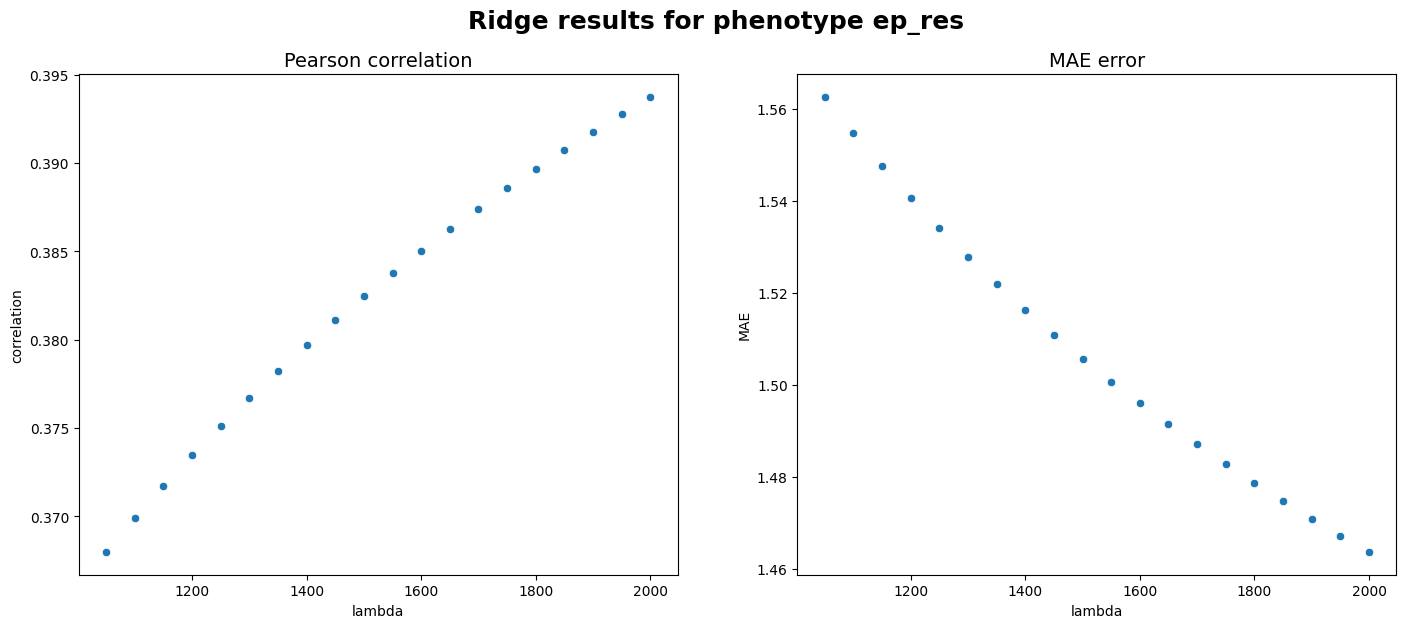

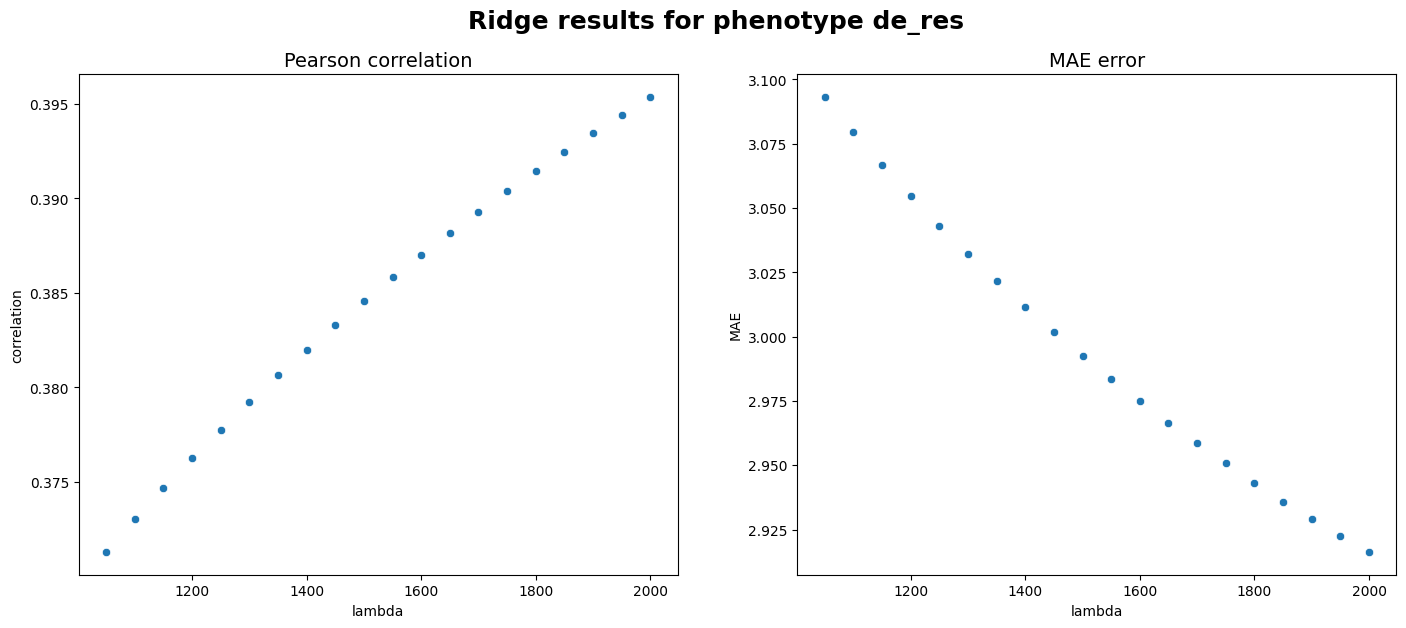

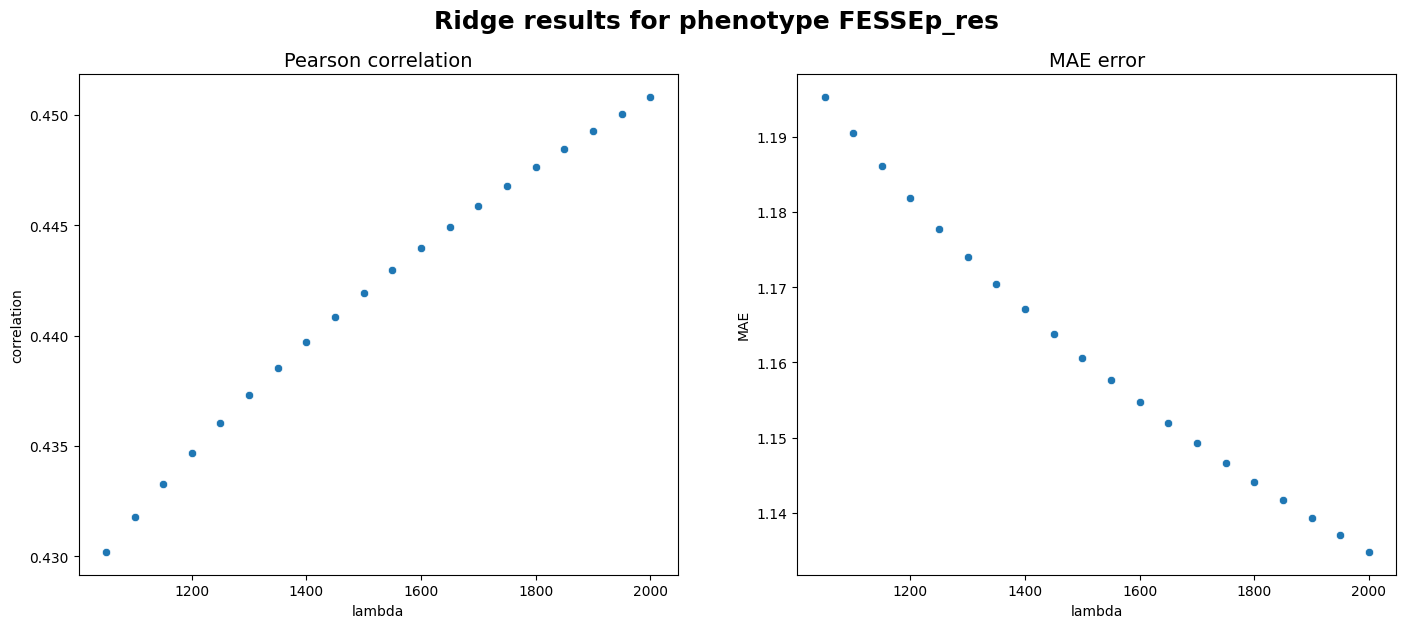

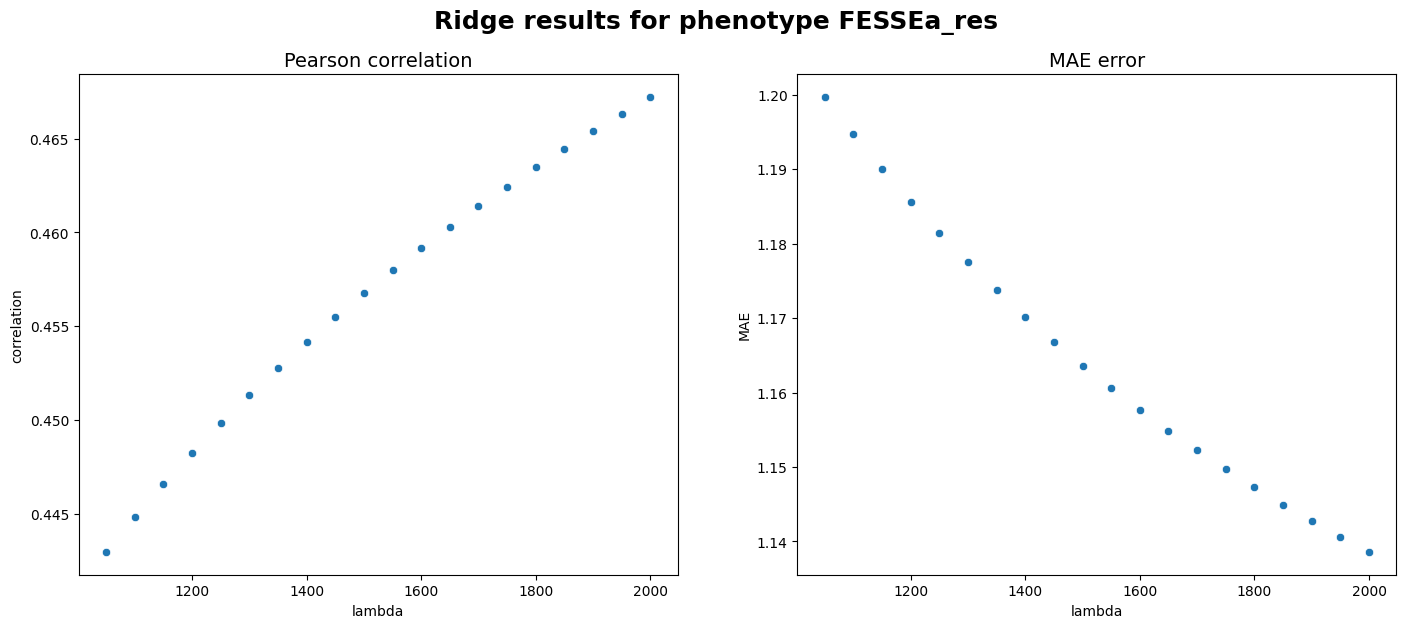

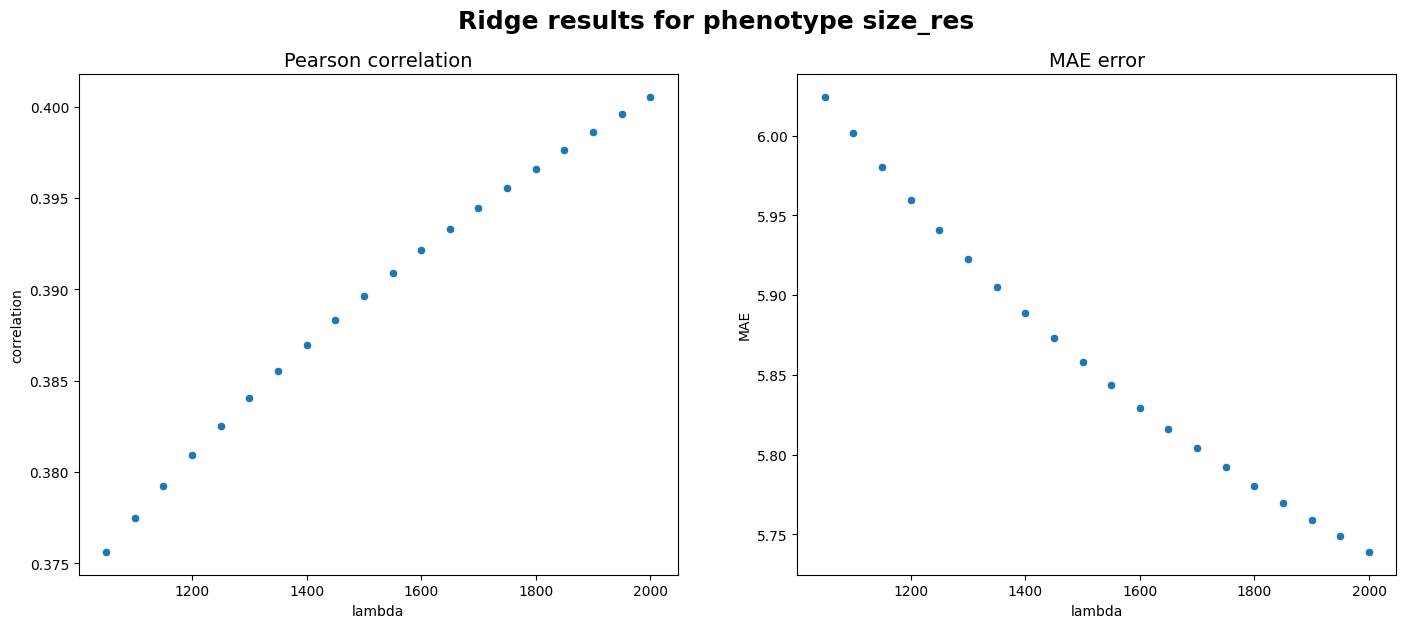

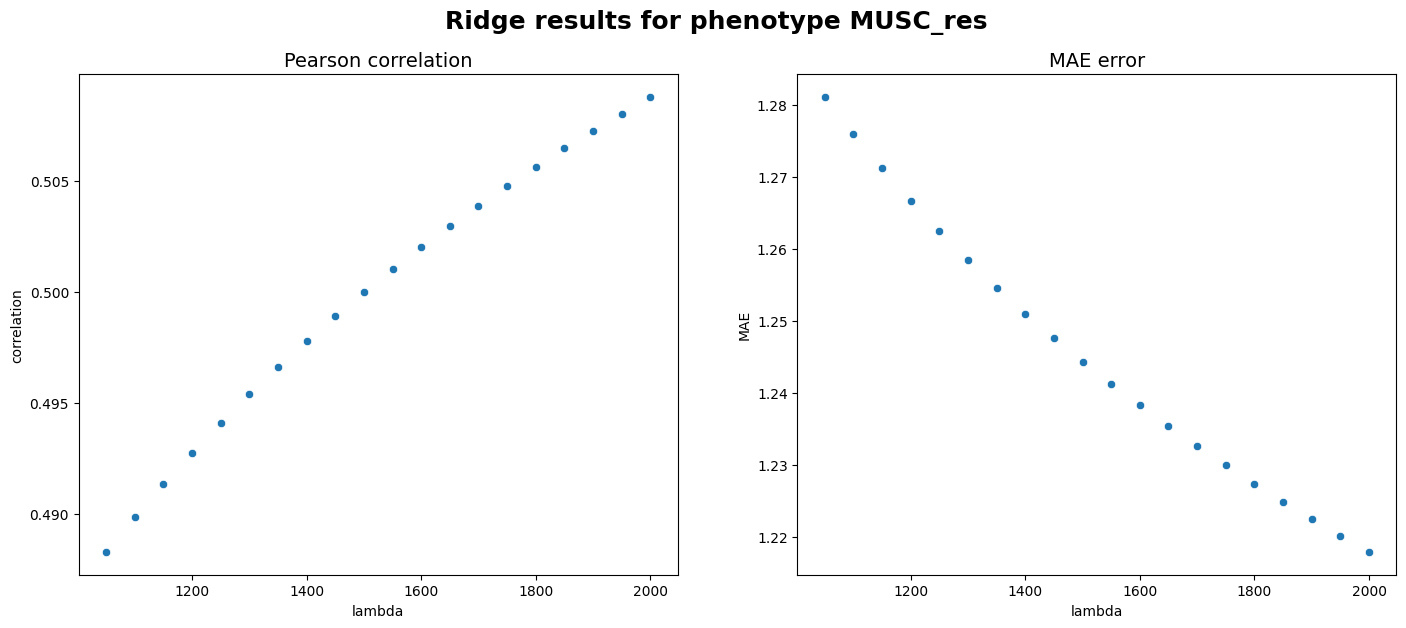

In [13]:
for phenotype in phenotypes:
    with open(f"../Results/ridge_4_{phenotype}.json", "r") as f:
        results = json.load(f)
        
        results_1_dimentions(
            results["correlation"],
            results["MAE"],
            results["dim_0_values"],
            f"Ridge results for phenotype {phenotype}",
            "Pearson correlation", 
            "MAE error", 
            results["dim_0_label"], 
            "correlation",
            "MAE")

## Summary of all runs

In order to have an overall overview of all values tries during the several runs of the model, I created here a plot covering all values of lambda tested and the appropriate model results.

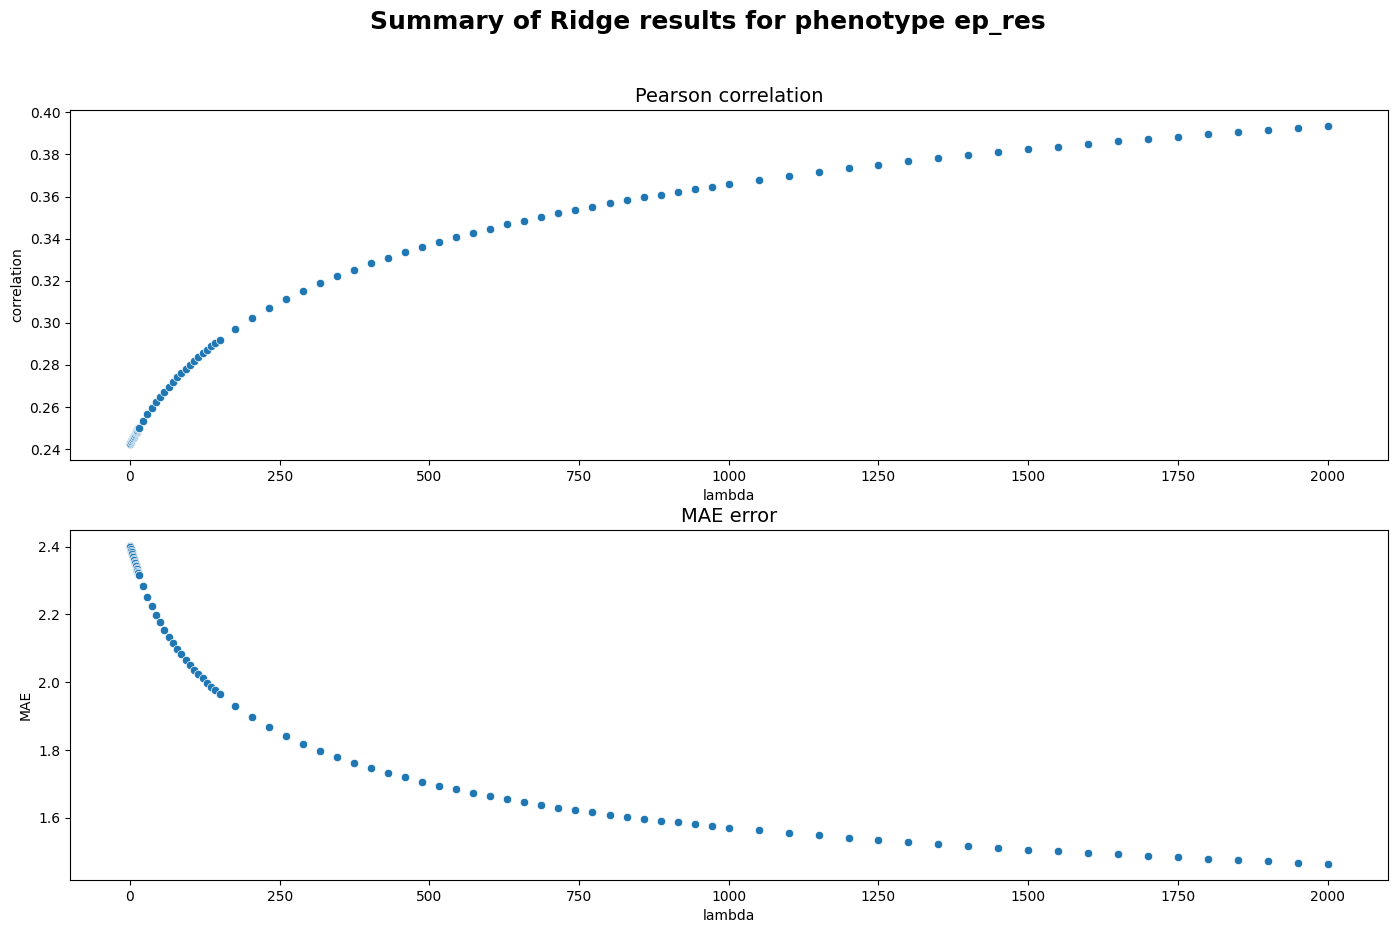

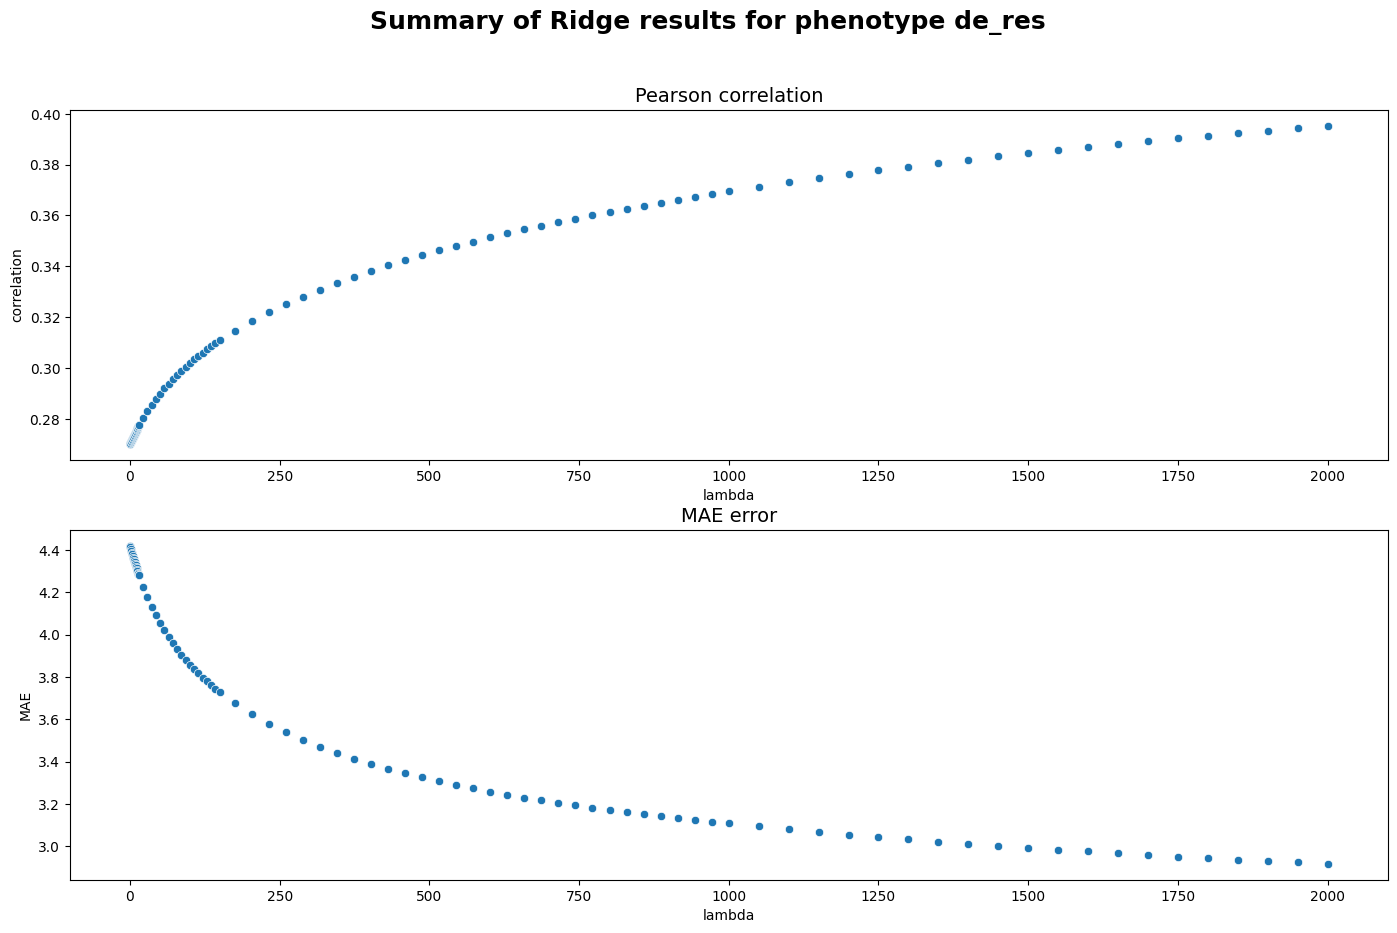

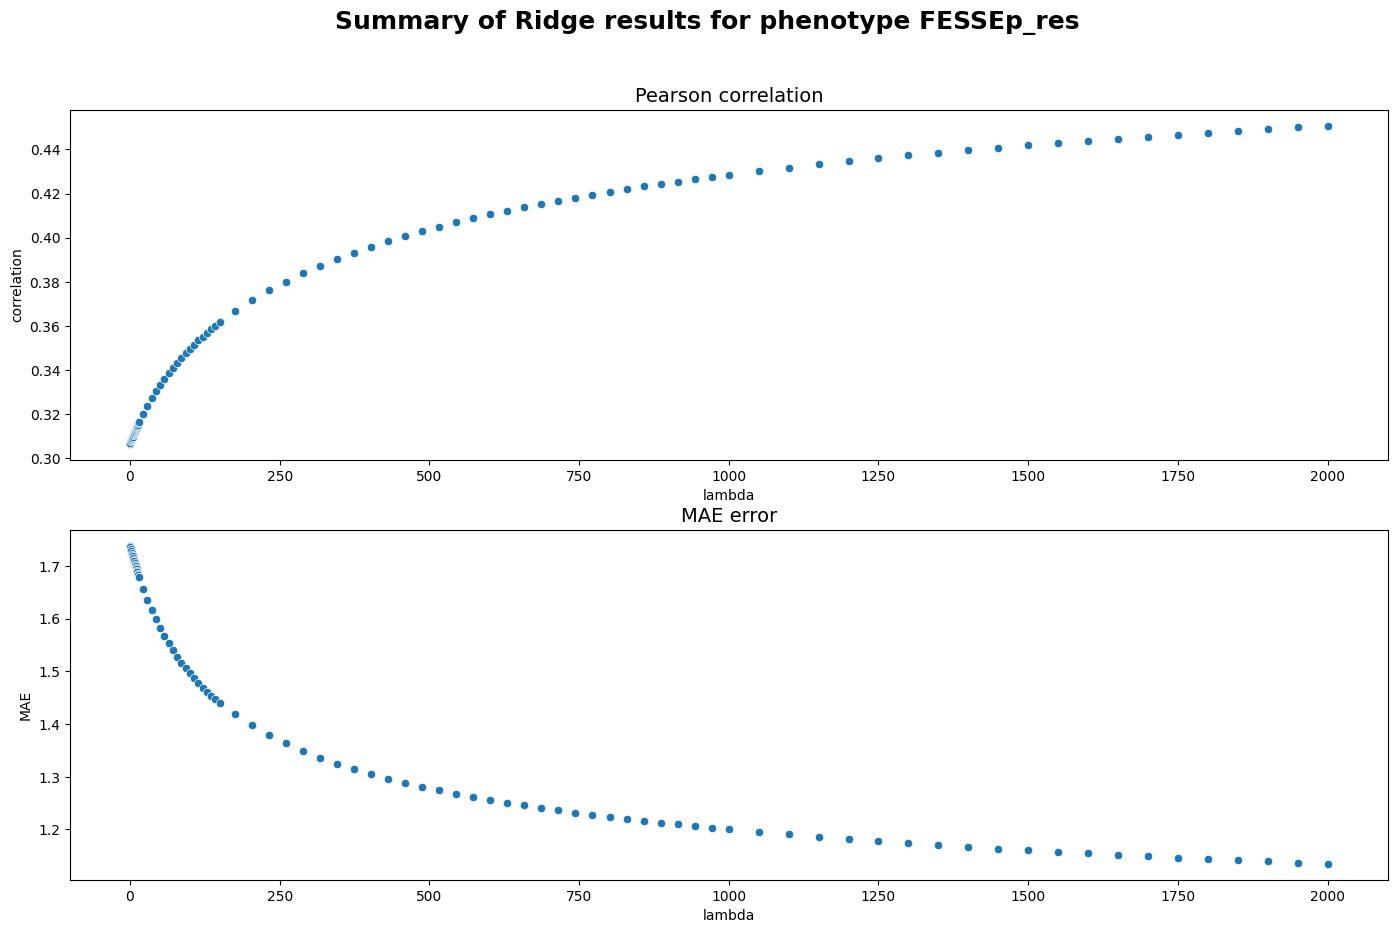

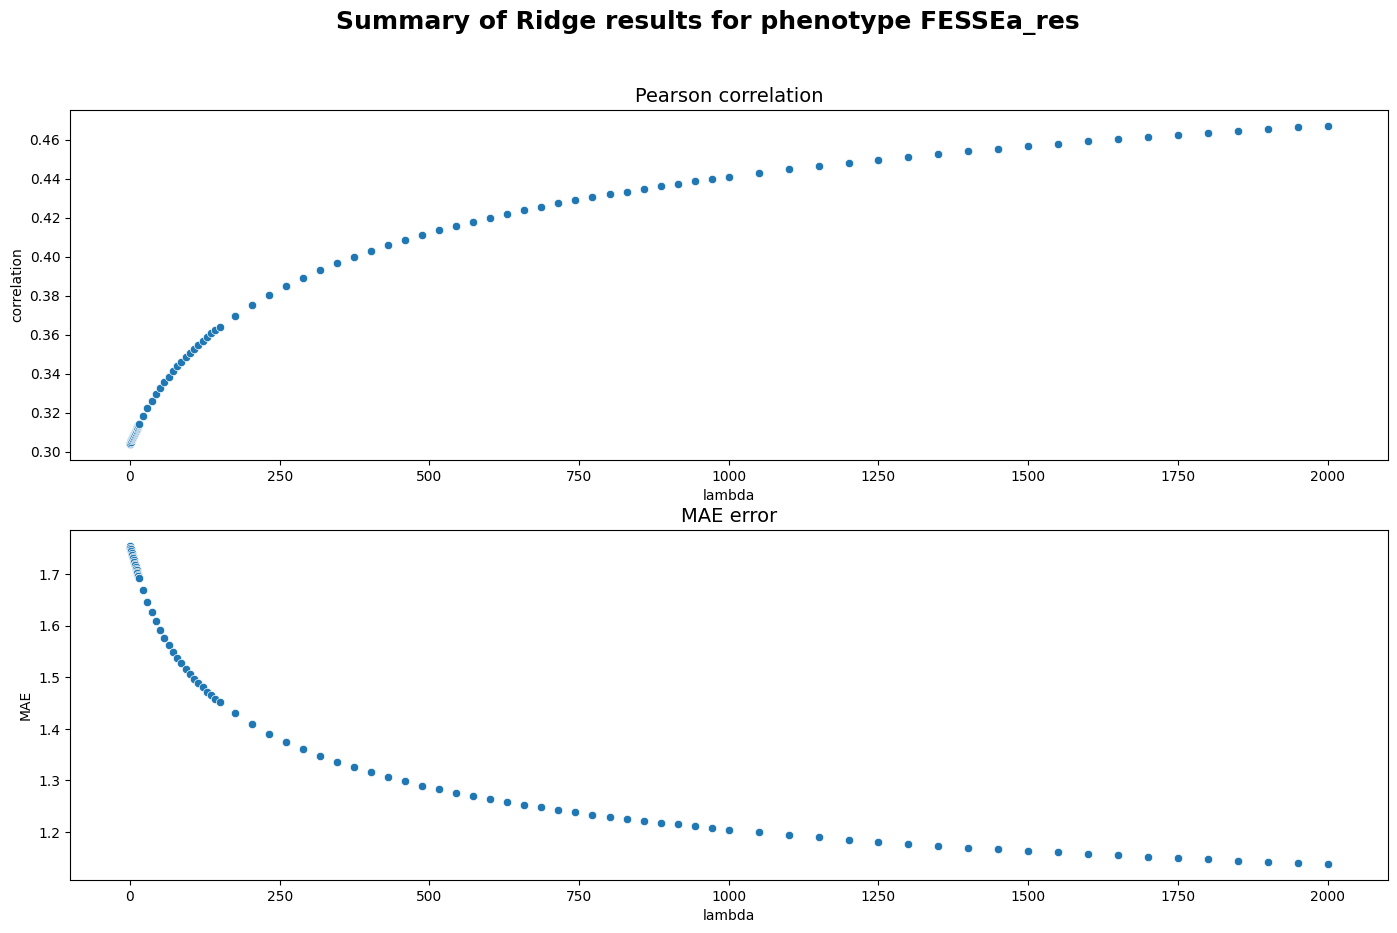

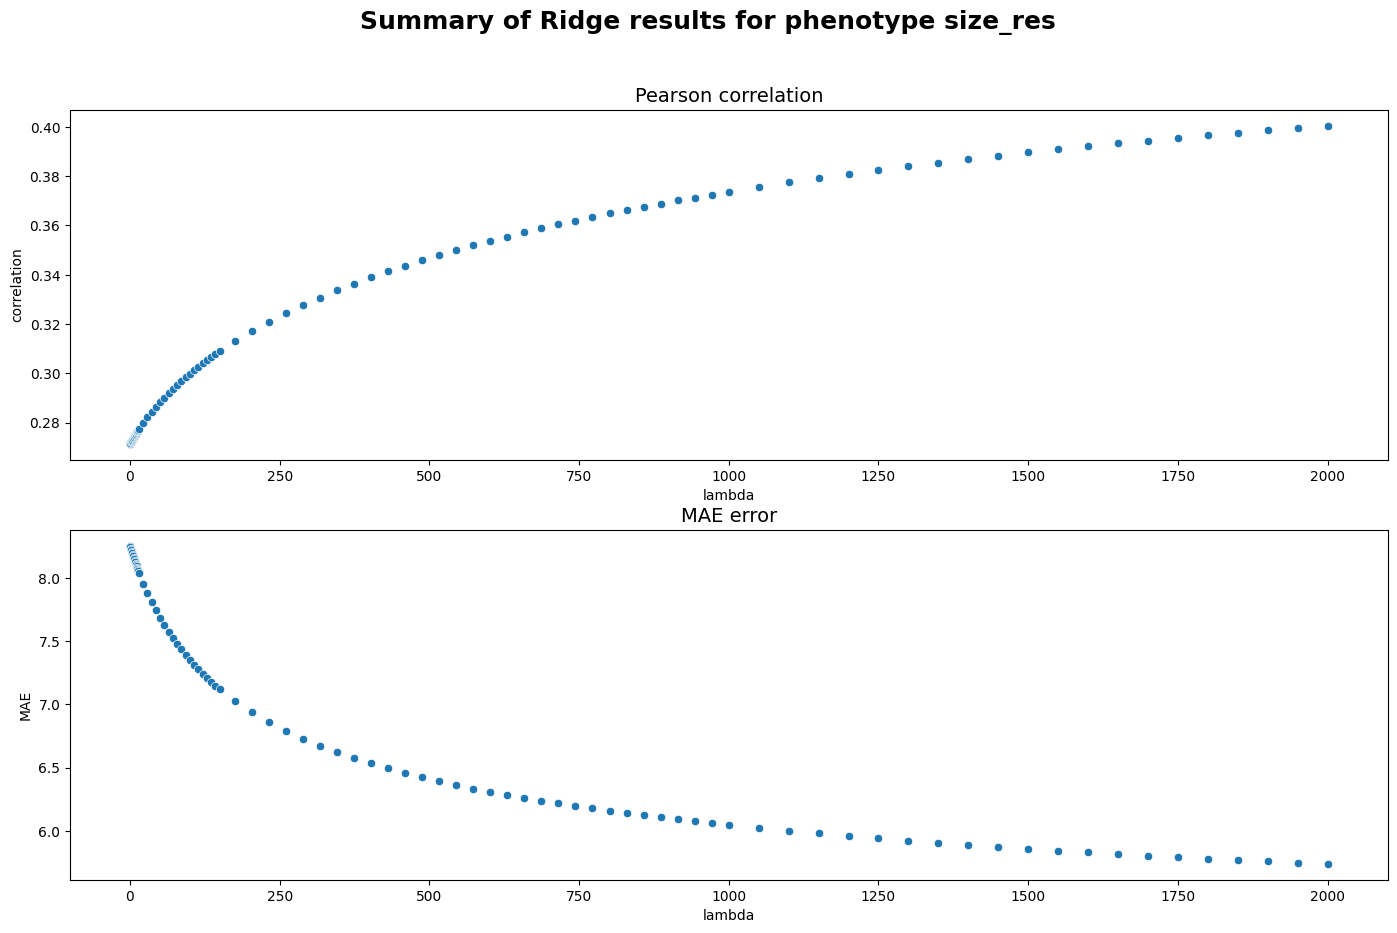

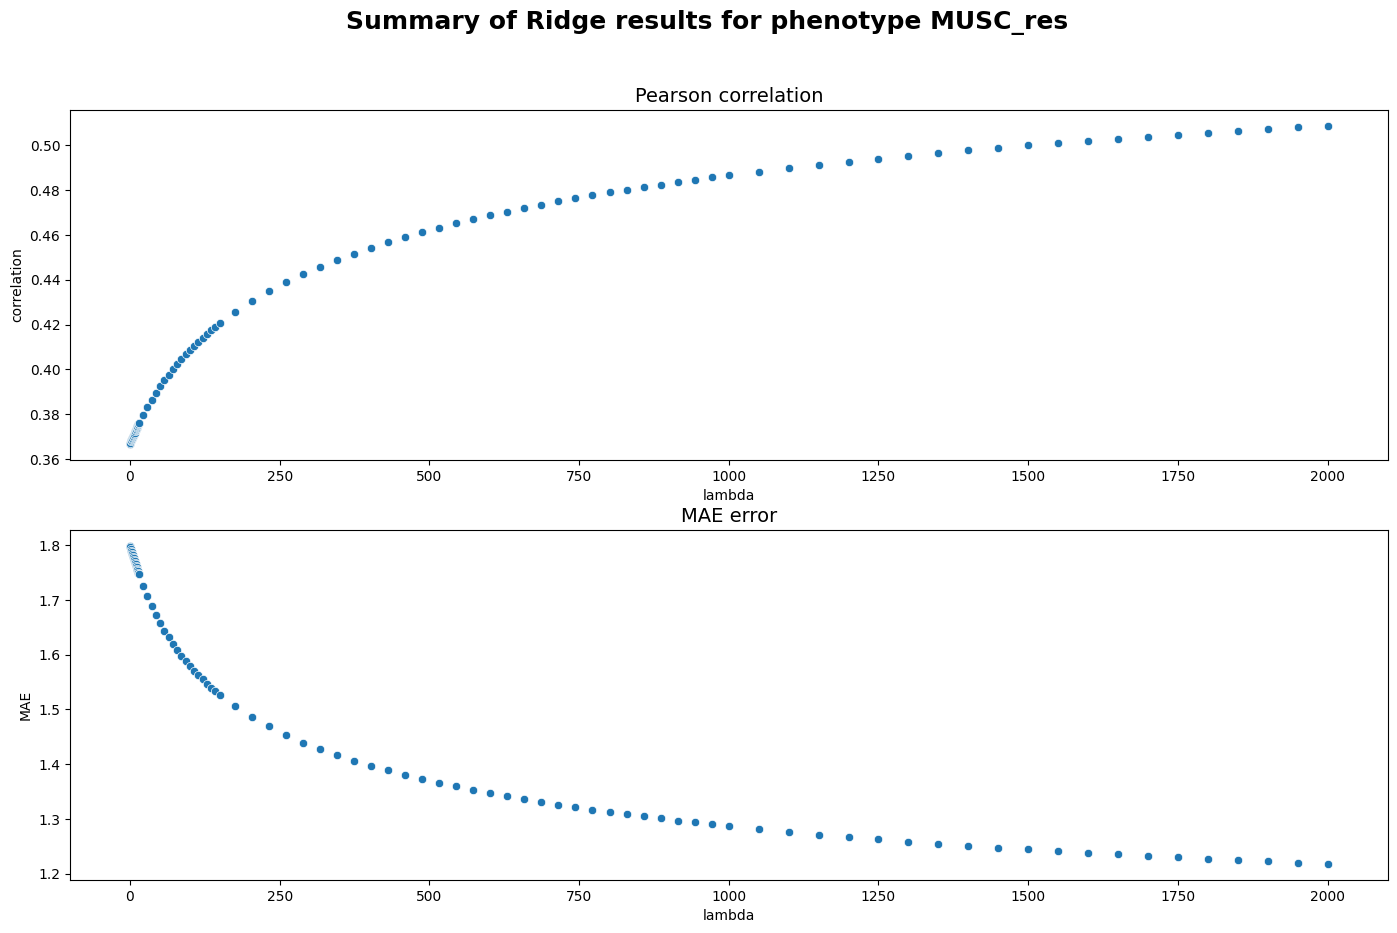

In [14]:
for phenotype in phenotypes:
    global_results_MAE = []
    global_results_corr = []
    global_results_lambda_val = []
    for i in range(1,5):
        if i == 1:
            filename = f"ridge_{phenotype}.json"
        else:
            filename = f"ridge_{i}_{phenotype}.json"
        with open(f"../Results/{filename}", "r") as f:
            results = json.load(f)
            global_results_MAE += results["MAE"]
            global_results_corr += results["correlation"]
            global_results_lambda_val += results["dim_0_values"]
            
    results_1_dimentions(
        global_results_corr,
        global_results_MAE,
        global_results_lambda_val,
        f"Summary of Ridge results for phenotype {phenotype}",
        "Pearson correlation", 
        "MAE error", 
        results["dim_0_label"], 
        "correlation",
        "MAE",
        vertical=True)